# Tutorial: Plotting field slice

In this tutorial, we demonstrate different ways of setting the FD field values.

Firstly, we import the required Field class.

In [1]:
from discretisedfield import Mesh, Field
%matplotlib inline

We create a three-dimansional vector field with domain that spans between:

- minimum coordinate $c_{1} = (1, 1, 1)$ and
- maximum coordinate $c_{2} = (10, 6, 9)$,

with discretisation $d = (1, 1, 1)$.

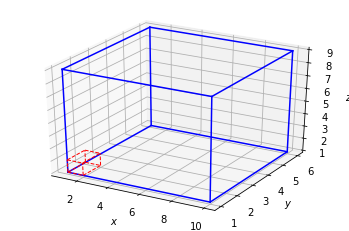

In [2]:
#PYTEST_VALIDATE_IGNORE_OUTPUT
c1 = (1, 1, 1)
c2 = (10, 6, 9)
cell = (1, 1, 1)
mesh = Mesh(c1, c2, cell=cell)
dim = 3
mesh.mpl()

After all the parameters are specified, we can create a field and give it a name.

In [3]:
field = Field(mesh, dim=dim, name='fdfield')

Now, we can set its value to be constant:

$$f(x, y, z) = (1, 3, 5)$$

In [4]:
value = (1, 3, 5)
field.value = value

After the field is set, we can plot its slice. Let's plot the slice perpendicular to the $x$ axis at the point $x=5$.

{}


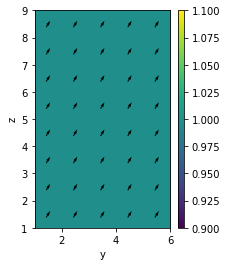

In [5]:
#PYTEST_VALIDATE_IGNORE_OUTPUT
field.plot_plane("x");

Now, we can set the field to be spatially varying, by providing a Python function defining its value:

$$f(x, y, z) = (2xy, 2y + x, x + z)$$

In [6]:
def value(pos):
    x, y, z = pos
    
    fx = 2*x*y
    fy = 2*y + x
    fz = x + z
    
    return (fx, fy, fz)

field.value = value

Now, we can plot the 'z' slice at point 5:

{'z': 5}


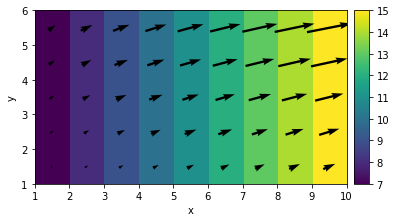

In [7]:
#PYTEST_VALIDATE_IGNORE_OUTPUT
field.plot_plane(z=5)

We can now see that $y-z$ slice is plotted, and colours correspond to the field's $x$-compoenent.